In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Produce visual

In [4]:
data = pd.read_csv('model_data3.csv')
data['late_bin'] = np.where(data['days_late']>0, 1, 0)
data['Scheduled_relevant_delivery_date'] = pd.to_datetime(data['Scheduled_relevant_delivery_date'], format='%Y-%m-%d')
viz_data = data.resample('W', on='Scheduled_relevant_delivery_date').late_bin.mean()
viz_data = viz_data.reset_index()
viz_data['late_bin'] = 1 - viz_data['late_bin']

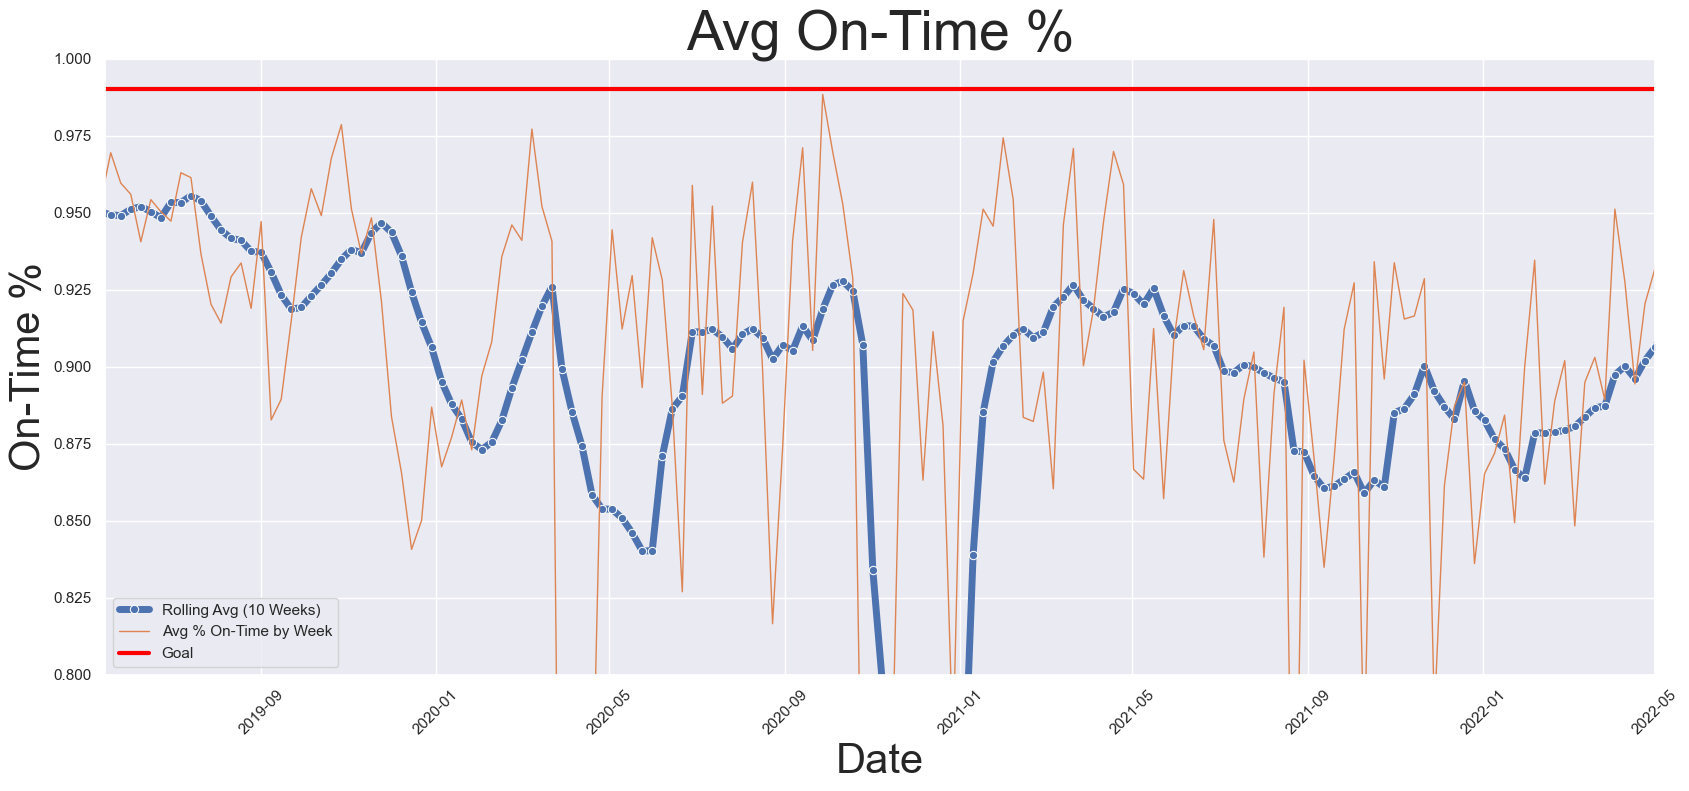

In [17]:
viz_data['Rolling Avg'] = viz_data['late_bin'].rolling(10).mean()
viz_data['Goal'] = .99
sns.set(rc={'figure.figsize':(20,8)})
g = sns.lineplot( x=pd.to_datetime(viz_data['Scheduled_relevant_delivery_date'], format='%Y-%m-%d'), y=viz_data['Rolling Avg'], marker='o', lw=5, label="Rolling Avg (10 Weeks)")
sns.lineplot( x=pd.to_datetime(viz_data['Scheduled_relevant_delivery_date'], format='%Y-%m-%d'), y=viz_data['late_bin'], lw=1, label="Avg % On-Time by Week")
sns.lineplot( x=pd.to_datetime(viz_data['Scheduled_relevant_delivery_date'], format='%Y-%m-%d'), y=viz_data['Goal'], lw=3, label="Goal", color = "red")
g.set_xlabel( "Date" , size = 30 )
g.set_ylabel("On-Time %", size = 30)
g.set_title( "Avg On-Time %" , size = 40 )
plt.xlim(pd.to_datetime('2019-05-15'), pd.to_datetime('2022-05-01'))
plt.ylim(.80, 1)
plt.xticks(rotation=45)
plt.savefig("Lateness_time.png")

Find total number of suppliers in data set

In [5]:
len(data['Supplier'].unique())

134

Find best performing supplier in each material group